In [1]:
from google import colab
colab.drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('/content/drive/MyDrive/JobCare_data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/JobCare_data/test.csv')

In [4]:
train

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,2,1192,935,1228,3,1,1,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,501947,True,True,False,True,False,False,1,6,2,1,118,113,110,4,1,1,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1
501948,501948,True,True,True,True,False,False,1,7,4,1,147,46,145,4,1,1,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1
501949,501949,True,False,False,True,False,False,1,1,2,1,46,147,145,4,1,1,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1


In [5]:
test

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,46399,True,True,True,False,False,False,2,0,4,1,147,46,145,4,1,1,2,4,95,3,3,5,1,1,2,759,147,1,5,91,425040,726084,2020-12-17 01:06:26
46400,46400,True,False,False,True,False,False,2,0,4,1,176,120,159,4,1,1,86,31,278,3,3,10,2,1,2,759,147,1,4,91,290061,156948,2020-12-29 21:57:25
46401,46401,True,True,False,True,True,True,2,0,3,1,145,46,147,5,1,1,288,279,278,3,3,10,2,1,2,759,147,1,4,288,307951,175069,2020-12-10 19:09:09
46402,46402,True,True,False,True,True,True,1,3,3,2,145,46,147,6,1,1,288,279,278,3,1,5,1,3,2,759,147,1,5,288,308354,174849,2020-12-07 14:04:34


In [6]:
code_d = pd.read_csv('/content/drive/MyDrive/JobCare_data/속성_D_코드.csv')
code_h = pd.read_csv('/content/drive/MyDrive/JobCare_data/속성_H_코드.csv')
code_l = pd.read_csv('/content/drive/MyDrive/JobCare_data/속성_L_코드.csv')

In [7]:
code_d

,속성 D 코드,속성 D 세분류코드,속성 D 소분류코드,속성 D 중분류코드,속성 D 대분류코드
0,4,4,3,2,1
1,5,5,3,2,1
2,7,7,6,2,1
3,8,8,6,2,1
4,9,8,6,2,1
...,...,...,...,...,...
1109,1254,1254,1254,1235,1235
1110,1255,1254,1254,1235,1235
1111,1256,1254,1254,1235,1235
1112,1257,1254,1254,1235,1235


In [8]:
code_h

,속성 H 코드,속성 H 중분류코드,속성 H 대분류코드
0,2,315,1
1,4,316,3
2,5,317,3
3,6,318,3
4,7,319,3
...,...,...,...
289,309,566,308
290,310,567,308
291,311,568,308
292,313,569,312


In [9]:
code_l

,속성 L 코드,속성 L 세분류코드,속성 L 소분류코드,속성 L 중분류코드,속성 L 대분류코드
0,1,1,1,1,2004
1,2,2,2,1,2004
2,3,3,2,1,2004
3,4,3,2,1,2004
4,5,5,2,1,2004
...,...,...,...,...,...
2020,2021,2021,2021,2021,2021
2021,2022,2022,2022,2022,2022
2022,2023,2023,2023,2023,2023
2023,2024,2024,2024,2024,2024


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [11]:
train.describe()

,id,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
count,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.0,501951.0,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,5.019510e+05,501951.000000,501951.00000
mean,250975.000000,1.340055,2.575767,2.782742,2.380049,537.296399,545.833926,534.994095,3.626302,1.0,1.0,116.394919,136.011991,122.784720,2.447811,2.332622,5.893970,1.237806,1.386052,1.963307,1030.863194,581.505215,2.240486,3.922988,132.530916,5.141115e+05,337674.345074,0.49974
std,144900.916822,0.473728,2.390872,0.883072,1.827910,411.441926,403.328742,415.752072,1.846717,0.0,0.0,91.032989,93.756209,90.947916,0.842948,0.887333,2.143146,0.425740,0.793128,0.188007,527.235733,413.915756,1.556468,1.159992,87.142309,2.943547e+05,219518.485557,0.50000
min,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000,0.000000,1.0,1.0,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,7.000000e+00,20.000000,0.00000
25%,125487.500000,1.000000,0.000000,2.000000,1.000000,117.000000,148.000000,136.000000,3.000000,1.0,1.0,44.000000,59.000000,59.000000,2.000000,1.000000,5.000000,1.000000,1.000000,2.000000,597.000000,138.000000,1.000000,3.000000,57.000000,2.599785e+05,140899.000000,0.00000
50%,250975.000000,1.000000,2.000000,3.000000,1.000000,453.000000,464.000000,452.000000,4.000000,1.0,1.0,95.000000,116.000000,95.000000,3.000000,3.000000,5.000000,1.000000,1.000000,2.000000,953.000000,581.000000,1.000000,4.000000,118.000000,4.981190e+05,304996.000000,0.00000
75%,376462.500000,2.000000,5.000000,4.000000,5.000000,935.000000,963.000000,929.000000,5.000000,1.0,1.0,189.000000,227.000000,200.000000,3.000000,3.000000,5.000000,1.000000,1.000000,2.000000,1582.000000,974.000000,4.000000,4.000000,199.000000,7.656345e+05,535184.000000,1.00000
max,501950.000000,2.000000,7.000000,5.000000,5.000000,1258.000000,1258.000000,1258.000000,11.000000,1.0,1.0,313.000000,313.000000,313.000000,3.000000,3.000000,10.000000,2.000000,4.000000,2.000000,2013.000000,1258.000000,5.000000,11.000000,311.000000,1.049005e+06,753628.000000,1.00000


In [12]:
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

plt.rcParams["font.size"] = 13
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')

# Target

Target Hist
0    251106
1    250845
Name: target, dtype: int64


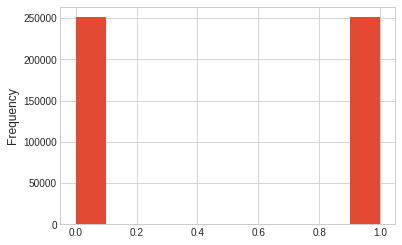

In [13]:
print('Target Hist')
print(train['target'].value_counts())
train['target'].plot.hist()

# Person_attribute_a

* 항목 1, 2

* 1일때 Target이 1일 가능성이 더 높음

1    331260
2    170691
Name: person_attribute_a, dtype: int64


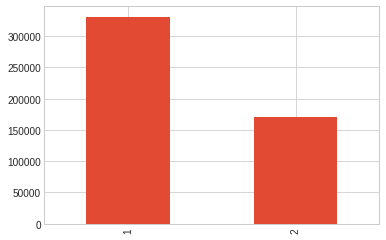

In [14]:
print(train['person_attribute_a'].value_counts())
train['person_attribute_a'].value_counts().plot.bar()

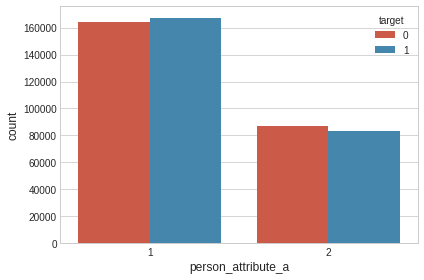

In [15]:
f = plt.figure()
ax = f.subplots()
x = 'person_attribute_a'
y = 'target'

sns.countplot('person_attribute_a', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Person_attribute_a_1

* 컬럼의 대부분은 0

* 6,7은 Target이 1이 더 많고 그 외는 Target은 0의 비중이 더 높음

0    158626
1     61195
5     57783
2     51895
6     49820
3     46340
4     44325
7     31967
Name: person_attribute_a_1, dtype: int64


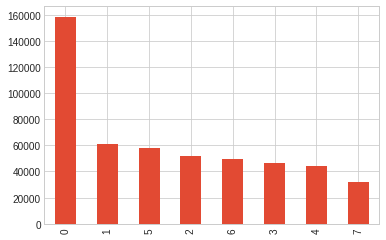

In [16]:
print(train['person_attribute_a_1'].value_counts())
train['person_attribute_a_1'].value_counts().plot.bar()

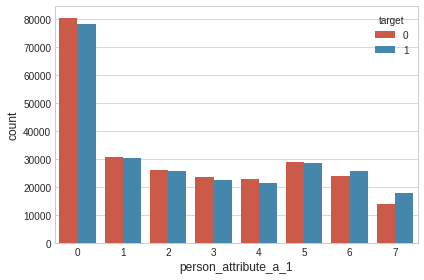

In [17]:
f = plt.figure()
ax = f.subplots()
x = 'person_attribute_a_1'
y = 'target'

sns.countplot('person_attribute_a_1', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Person_attribute_b

* 2가 카운트가 가장 많음

* 2일때 Target 1이 더 높음

2    223884
3    139489
4    121200
1     10150
5      7123
0       105
Name: person_attribute_b, dtype: int64


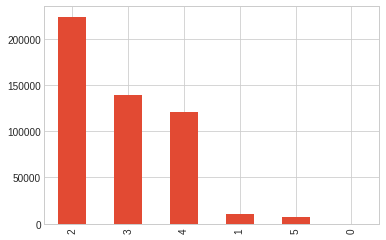

In [18]:
print(train['person_attribute_b'].value_counts())
train['person_attribute_b'].value_counts().plot.bar()

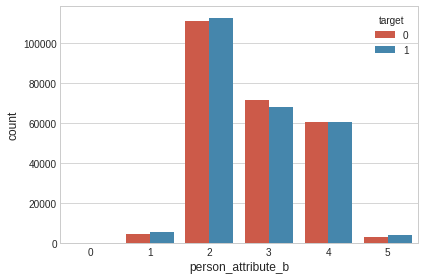

In [19]:
f = plt.figure()
ax = f.subplots()
x = 'person_attribute_b'
y = 'target'

sns.countplot('person_attribute_b', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Person_prefer_c

* 1, 5가 대부분 비중을 차지함

* 1은 Target 0이 더 많고 5는 Target 1이 더 많음


1    304571
5    156688
2     20223
3     15665
4      4804
Name: person_prefer_c, dtype: int64


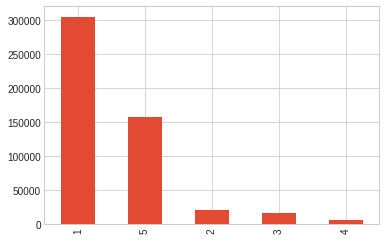

In [20]:
print(train['person_prefer_c'].value_counts())
train['person_prefer_c'].value_counts().plot.bar()

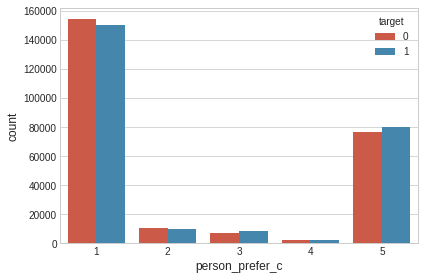

In [21]:
f = plt.figure()
ax = f.subplots()
x = 'person_prefer_c'
y = 'target'

sns.countplot('person_prefer_c', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Person_prefer_d_1

* d_1, d_2, d_3 컬럼이 많아서 그래프화 해서 비교하기 어려움

114     41720
102     25470
1227    24337
181     13213
857     13059
        ...  
191         1
801         1
914         1
559         1
1156        1
Name: person_prefer_d_1, Length: 1093, dtype: int64


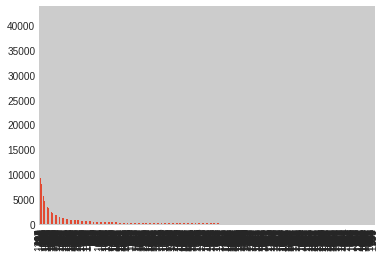

In [22]:
print(train['person_prefer_d_1'].value_counts())
train['person_prefer_d_1'].value_counts().plot.bar()

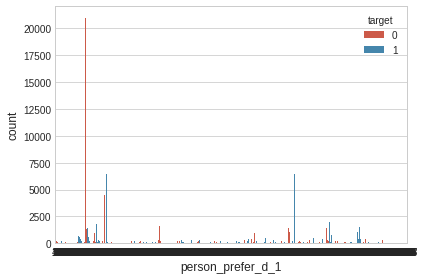

In [23]:
f = plt.figure()
ax = f.subplots()
x = 'person_prefer_d_1'
y = 'target'

sns.countplot('person_prefer_d_1', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Person_prefer_e

* 4,3,5,0,6 컬럼에 비중이 높음

* 0, 3은 Target 0이고 5, 6, 7, 8, 9, 10, 11은 Target 1이 더 높음

4     160100
3     139683
5      81635
0      66676
6      31407
7       8641
8       6259
2       2323
10      1936
9       1473
11      1452
1        366
Name: person_prefer_e, dtype: int64


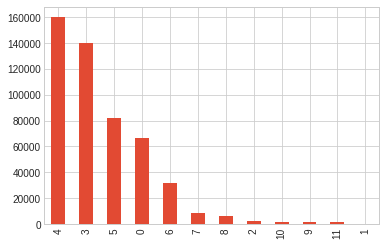

In [24]:
print(train['person_prefer_e'].value_counts())
train['person_prefer_e'].value_counts().plot.bar()

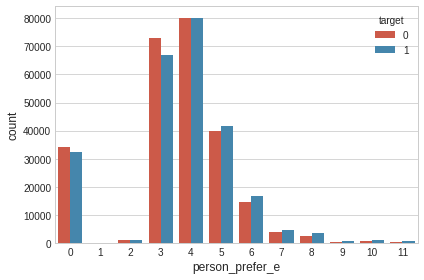

In [25]:
f = plt.figure()
ax = f.subplots()
x = 'person_prefer_e'
y = 'target'

sns.countplot('person_prefer_e', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Person_prefer_f

* 컬럼이 1만 있음

* Target 0,1 반반

1    501951
Name: person_prefer_f, dtype: int64


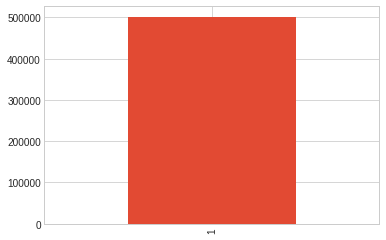

In [26]:
print(train['person_prefer_f'].value_counts())
train['person_prefer_f'].value_counts().plot.bar()

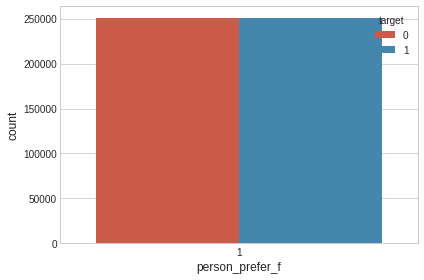

In [27]:
f = plt.figure()
ax = f.subplots()
x = 'person_prefer_f'
y = 'target'

sns.countplot('person_prefer_f', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Person_prefer_g

* prefer_f와 같이 컬럼이 1만 있음

1    501951
Name: person_prefer_g, dtype: int64


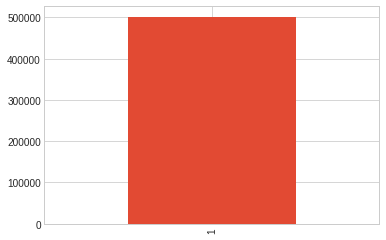

In [28]:
print(train['person_prefer_g'].value_counts())
train['person_prefer_g'].value_counts().plot.bar()

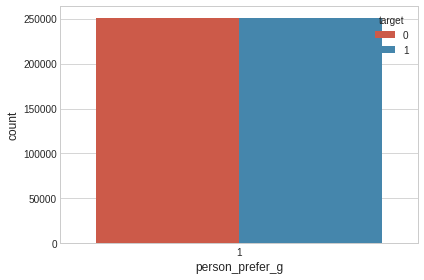

In [29]:
f = plt.figure()
ax = f.subplots()
x = 'person_prefer_g'
y = 'target'

sns.countplot('person_prefer_g', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Person_prefer_h_1

* h_1, h_2, h_3 컬럼수가 많아서 그래프로 비교하기 어려움

4      35257
31     31393
2      22458
59     20938
49     19155
       ...  
248        9
249        9
70         8
267        8
276        1
Name: person_prefer_h_1, Length: 279, dtype: int64


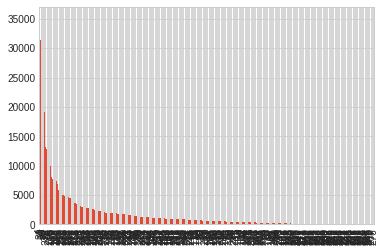

In [30]:
print(train['person_prefer_h_1'].value_counts())
train['person_prefer_h_1'].value_counts().plot.bar()

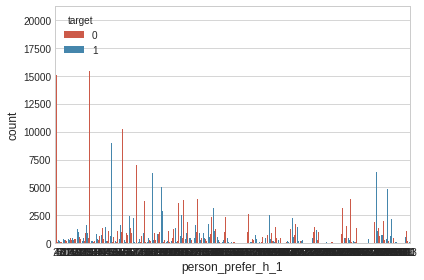

In [31]:
f = plt.figure()
ax = f.subplots()
x = 'person_prefer_h_1'
y = 'target'

sns.countplot('person_prefer_h_1', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Contents_attribute_i

* 3의 비중이 가장 높음

* 3의 Target 1이 더 높고 1의 Target 0이 더 높음

3    341052
1    116273
2     44626
Name: contents_attribute_i, dtype: int64


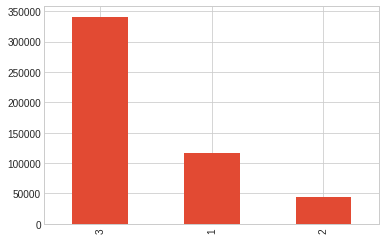

In [32]:
print(train['contents_attribute_i'].value_counts())
train['contents_attribute_i'].value_counts().plot.bar()

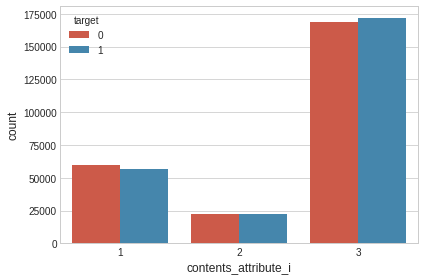

In [33]:
f = plt.figure()
ax = f.subplots()
x = 'contents_attribute_i'
y = 'target'

sns.countplot('contents_attribute_i', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Contents_attribute_a

* 3의 비중이 더 높음

* 3의 Target 0의 비중이 더 높고 1의 Target 1의 비중이 더 높음

3    308855
1    141895
2     51201
Name: contents_attribute_a, dtype: int64


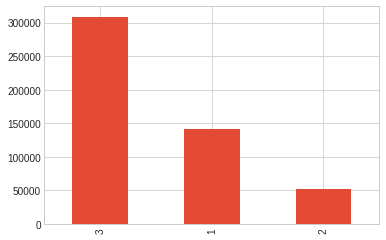

In [34]:
print(train['contents_attribute_a'].value_counts())
train['contents_attribute_a'].value_counts().plot.bar()

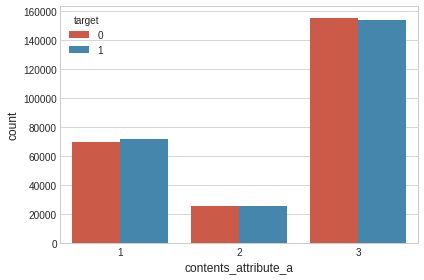

In [35]:
f = plt.figure()
ax = f.subplots()
x = 'contents_attribute_a'
y = 'target'

sns.countplot('contents_attribute_a', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Contents_attribute_j_1

* 5의 비중이 가장 높음

* 4,5를 제외한 다른 컬럼들은 Target 0의 비중이 더 높음

5     330790
10     89307
3      30664
4      19649
9      19115
6      10808
2       1416
8        137
1         65
Name: contents_attribute_j_1, dtype: int64


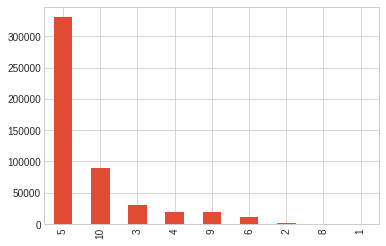

In [36]:
print(train['contents_attribute_j_1'].value_counts())
train['contents_attribute_j_1'].value_counts().plot.bar()

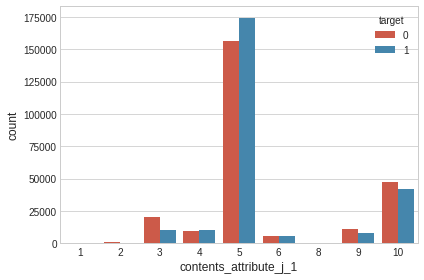

In [37]:
f = plt.figure()
ax = f.subplots()
x = 'contents_attribute_j_1'
y = 'target'

sns.countplot('contents_attribute_j_1', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Contents_attribute_j

* 1의 컬럼이 비중이 높음

* 1의 Target 1이 높고 2의 Target 0이 높음

1    382584
2    119367
Name: contents_attribute_j, dtype: int64


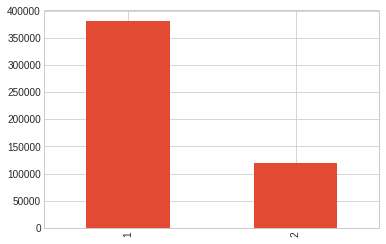

In [38]:
print(train['contents_attribute_j'].value_counts())
train['contents_attribute_j'].value_counts().plot.bar()

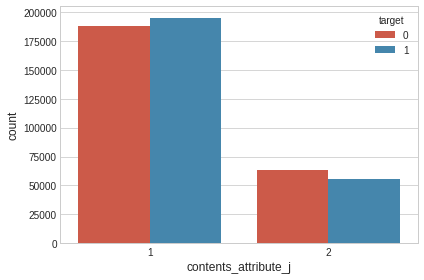

In [39]:
f = plt.figure()
ax = f.subplots()
x = 'contents_attribute_j'
y = 'target'

sns.countplot('contents_attribute_j', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Contents_attribute_c

* 1의 컬럼이 가장 비중이 높음

* 1의 Target 1의 비중이 높고 그 외는 Target 0의 비중이 높음

1    401409
3     82929
2     12459
4      5154
Name: contents_attribute_c, dtype: int64


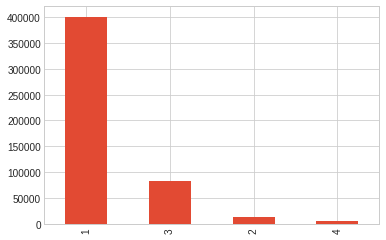

In [40]:
print(train['contents_attribute_c'].value_counts())
train['contents_attribute_c'].value_counts().plot.bar()

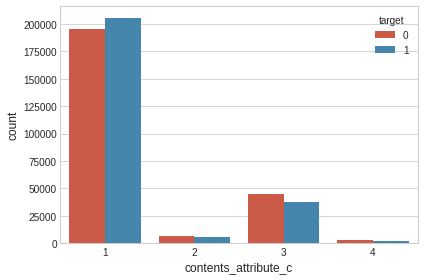

In [41]:
f = plt.figure()
ax = f.subplots()
x = 'contents_attribute_c'
y = 'target'

sns.countplot('contents_attribute_c', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Contents_attribute_k

* 거의 대부분 2 컬럼에 비중이 높음

* Target 1의 비중이 높음

2    483533
1     18418
Name: contents_attribute_k, dtype: int64


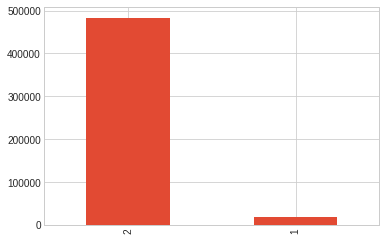

In [42]:
print(train['contents_attribute_k'].value_counts())
train['contents_attribute_k'].value_counts().plot.bar()

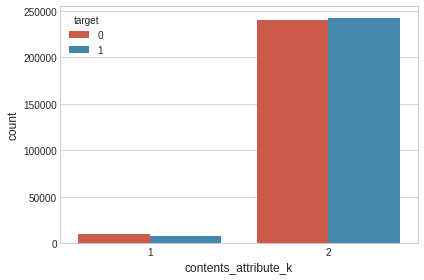

In [43]:
f = plt.figure()
ax = f.subplots()
x = 'contents_attribute_k'
y = 'target'

sns.countplot('contents_attribute_k', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Contents_attribute_l

* l d 컬럼의 수가 많아서 그래프로 비교하기 어려움

759     15373
1648    11984
1835    10967
861      9899
572      9604
        ...  
434         1
177         1
43          1
1448        1
170         1
Name: contents_attribute_l, Length: 1752, dtype: int64


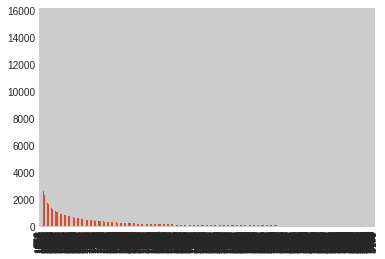

In [44]:
print(train['contents_attribute_l'].value_counts())
train['contents_attribute_l'].value_counts().plot.bar()

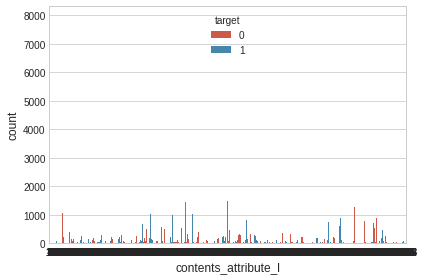

In [45]:
f = plt.figure()
ax = f.subplots()
x = 'contents_attribute_l'
y = 'target'

sns.countplot('contents_attribute_l', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Contents_attribute_m

* 컬럼 1에 비중이 가장 높음

* 1,5의 Target은 1에 비중이 높음

* 3,4의 Target은 0에 비중이 높음

1    272885
4     86367
5     67639
2     57114
3     17946
Name: contents_attribute_m, dtype: int64


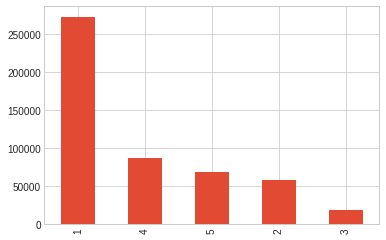

In [46]:
print(train['contents_attribute_m'].value_counts())
train['contents_attribute_m'].value_counts().plot.bar()

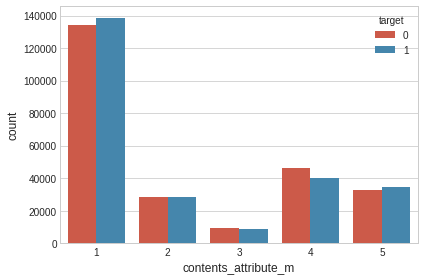

In [47]:
f = plt.figure()
ax = f.subplots()
x = 'contents_attribute_m'
y = 'target'

sns.countplot('contents_attribute_m', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Contents_attribute_e

* 3,4,5가 대부분의 비중이 높음

* 0,1,2,3의 Target 0의 비중이 높고 4,5,6,7,8의 Target 1의 비중이 높음

3     187593
4     175628
5      81684
6      27776
2       9414
7       7734
1       5179
8       3991
0       1025
9        908
10       673
11       346
Name: contents_attribute_e, dtype: int64


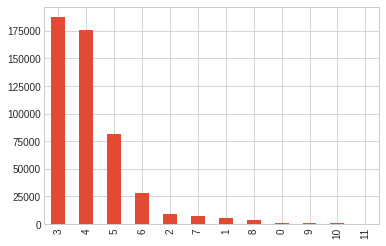

In [48]:
print(train['contents_attribute_e'].value_counts())
train['contents_attribute_e'].value_counts().plot.bar()

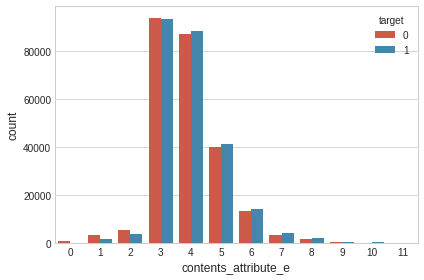

In [49]:
f = plt.figure()
ax = f.subplots()
x = 'contents_attribute_e'
y = 'target'

sns.countplot('contents_attribute_e', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# Contents_attribute_h

* 컬럼수가 많아서 그래프로 비교하기 어려움

139    15030
288    13430
68     11877
127    11243
43     11018
       ...  
248       23
220       21
276       13
267       12
164        9
Name: contents_attribute_h, Length: 250, dtype: int64


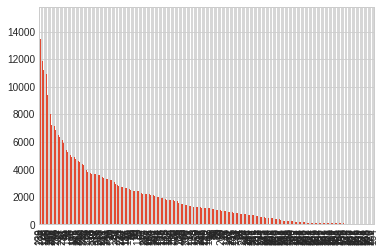

In [50]:
print(train['contents_attribute_h'].value_counts())
train['contents_attribute_h'].value_counts().plot.bar()

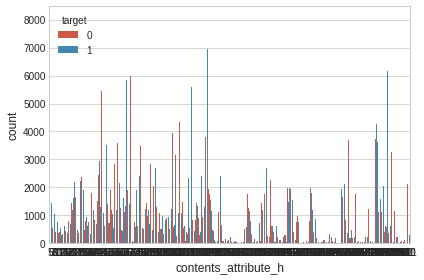

In [51]:
f = plt.figure()
ax = f.subplots()
x = 'contents_attribute_h'
y = 'target'

sns.countplot('contents_attribute_h', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

In [57]:
train

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,2,1192,935,1228,3,1,1,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,501947,True,True,False,True,False,False,1,6,2,1,118,113,110,4,1,1,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1
501948,501948,True,True,True,True,False,False,1,7,4,1,147,46,145,4,1,1,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1
501949,501949,True,False,False,True,False,False,1,1,2,1,46,147,145,4,1,1,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1


# D_l_match_yn

* True의 비중이 더 높음

* True일 때 Target은 1이 나올 확률이 높음

True     315268
False    186683
Name: d_l_match_yn, dtype: int64


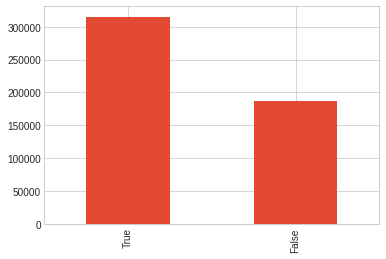

In [62]:
match_yn = train['d_l_match_yn']
print(match_yn.value_counts())
match_yn.value_counts().plot.bar()

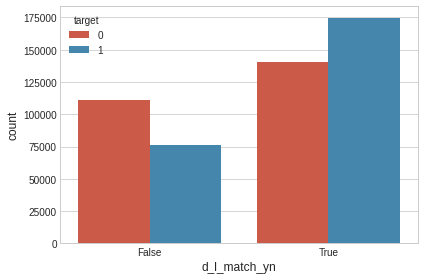

In [63]:
f = plt.figure()
ax = f.subplots()
x = 'd_l_match_yn'
y = 'target'

sns.countplot('d_l_match_yn', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# D_m_match_yn

* False의 비중이 더 높음

* False일 때 Target 0이 나올 확률이 더 높음

False    368324
True     133627
Name: d_m_match_yn, dtype: int64


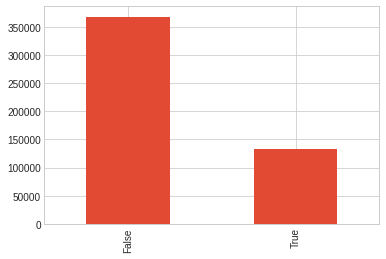

In [64]:
print(train['d_m_match_yn'].value_counts())
train['d_m_match_yn'].value_counts().plot.bar()

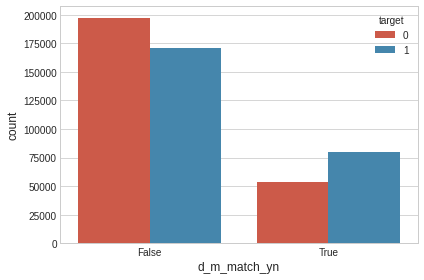

In [65]:
f = plt.figure()
ax = f.subplots()
x = 'd_m_match_yn'
y = 'target'

sns.countplot('d_m_match_yn', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# D_s_match_yn

* False의 비중이 더 높음

* False일 때 Target 0이 나올 확률이 더 높음 

* True일 때 Target 1이 나올 확률이 더 높음

False    426694
True      75257
Name: d_s_match_yn, dtype: int64


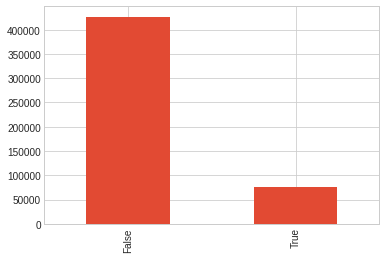

In [66]:
print(train['d_s_match_yn'].value_counts())
train['d_s_match_yn'].value_counts().plot.bar()

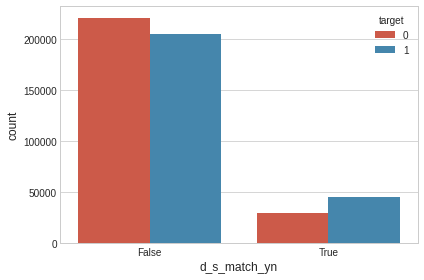

In [67]:
f = plt.figure()
ax = f.subplots()
x = 'd_s_match_yn'
y = 'target'

sns.countplot('d_s_match_yn', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# H_l_match_yn

* True의 비중이 더 높음

* True일 때 Target 1이 나올 확률이 높음

* False일 때 Target 0이 나올 확률이 높음

True     399338
False    102613
Name: h_l_match_yn, dtype: int64


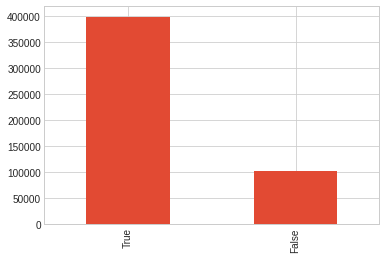

In [68]:
print(train['h_l_match_yn'].value_counts())
train['h_l_match_yn'].value_counts().plot.bar()

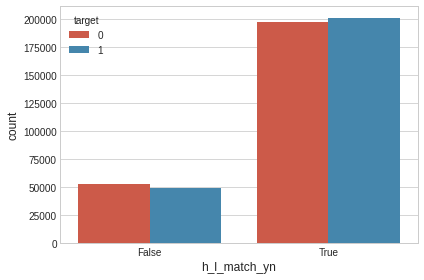

In [69]:
f = plt.figure()
ax = f.subplots()
x = 'h_l_match_yn'
y = 'target'

sns.countplot('h_l_match_yn', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# H_m_match_yn

* False의 비중이 더 높음

* False일 때 Target 0 나올 확률이 높음

* True일 때 Target 1 나올 확률이 높음

False    318818
True     183133
Name: h_m_match_yn, dtype: int64


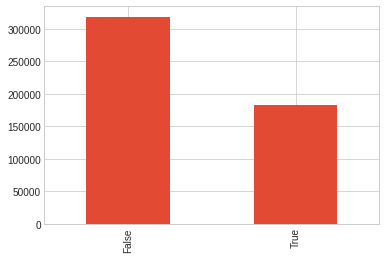

In [71]:
print(train['h_m_match_yn'].value_counts())
train['h_m_match_yn'].value_counts().plot.bar()

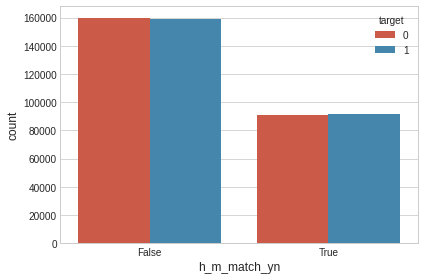

In [72]:
f = plt.figure()
ax = f.subplots()
x = 'h_m_match_yn'
y = 'target'

sns.countplot('h_m_match_yn', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

# H_s_match_yn

* False의 비중이 더 높음

* False일 때 Target 0이 나올 확률이 높음

* True일 때 Target 1이 나올 확률이 높음

False    365322
True     136629
Name: h_s_match_yn, dtype: int64


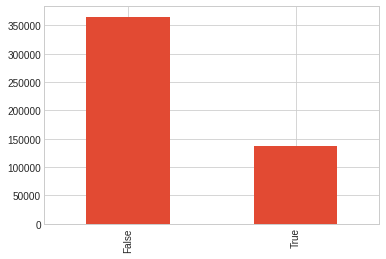

In [73]:
print(train['h_s_match_yn'].value_counts())
train['h_s_match_yn'].value_counts().plot.bar()

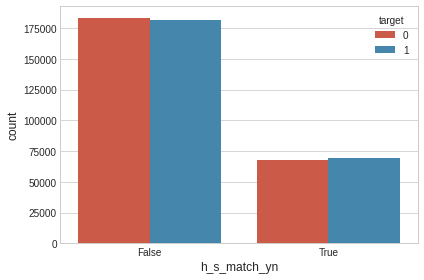

In [74]:
f = plt.figure()
ax = f.subplots()
x = 'h_s_match_yn'
y = 'target'

sns.countplot('h_s_match_yn', hue = 'target', data = train, ax = ax)

plt.tight_layout(h_pad = 2.5)

In [92]:
from datetime import datetime
days = train['contents_open_dt'].astype('str')
days = days.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [94]:
days = pd.DataFrame(days)
days = days.rename(columns = {'contents_open_dt': 'date'})
year = days['date'].apply(lambda x: x.timetuple()[0])
month = days['date'].apply(lambda x: x.timetuple()[1])
day = days['date'].apply(lambda x: x.timetuple()[2])

In [96]:
month

0         1
1         6
2         7
3         1
4         3
         ..
501946    3
501947    1
501948    8
501949    6
501950    5
Name: date, Length: 501951, dtype: int64

In [97]:
day

0         17
1         18
2          8
3         13
4          9
          ..
501946    13
501947    20
501948     5
501949    15
501950    25
Name: date, Length: 501951, dtype: int64

2     50424
3     49029
6     47444
7     47129
1     45683
10    45605
11    44979
8     44458
4     42790
9     42393
5     42017
Name: date, dtype: int64


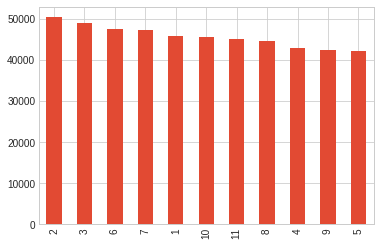

In [102]:
print(month.value_counts())
mper = (month.value_counts()/len(month))*100
month.value_counts().plot.bar()

In [104]:
print(mper)

2     10.045602
3      9.767686
6      9.451919
7      9.389163
1      9.101088
10     9.085548
11     8.960835
8      8.857040
4      8.524736
9      8.445645
5      8.370737
Name: date, dtype: float64


6     19482
13    19059
20    18448
3     18229
10    18180
7     17909
17    17648
14    17257
16    17122
2     16825
21    16781
12    16743
9     16723
11    16718
27    16499
19    16459
18    16417
24    16263
28    16136
8     16037
23    15778
4     15717
26    15270
5     15200
22    15194
25    15168
15    15164
29    14526
30    13869
1     12638
31     8492
Name: date, dtype: int64


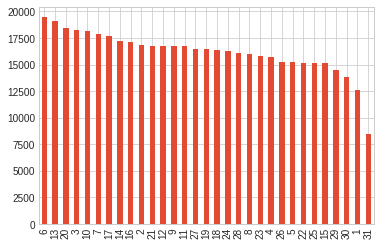

In [105]:
print(day.value_counts())
day.value_counts().plot.bar()
dper = (day.value_counts()/len(day))*100

In [106]:
print(dper)

6     3.881255
13    3.796984
20    3.675259
3     3.631629
10    3.621867
7     3.567878
17    3.515881
14    3.437985
16    3.411090
2     3.351921
21    3.343155
12    3.335585
9     3.331600
11    3.330604
27    3.286974
19    3.279005
18    3.270638
24    3.239958
28    3.214656
8     3.194933
23    3.143335
4     3.131182
26    3.042130
5     3.028184
22    3.026989
25    3.021809
15    3.021012
29    2.893908
30    2.763019
1     2.517776
31    1.691799
Name: date, dtype: float64


In [110]:
code_d.describe()

,속성 D 코드,속성 D 세분류코드,속성 D 소분류코드,속성 D 중분류코드,속성 D 대분류코드
count,1114.000000,1114.000000,1114.000000,1114.00000,1114.000000
mean,627.250449,625.460503,620.057451,597.55386,538.036804
std,361.091553,361.259525,362.206226,368.99916,347.298647
min,4.000000,4.000000,3.000000,2.00000,1.000000
25%,313.250000,313.250000,312.000000,297.00000,216.000000
50%,628.500000,627.000000,620.000000,619.00000,618.000000
75%,937.750000,936.000000,928.000000,927.00000,926.000000
max,1258.000000,1258.000000,1258.000000,1258.00000,1258.000000


In [111]:
code_h.describe()

,속성 H 코드,속성 H 중분류코드,속성 H 대분류코드
count,294.000000,294.000000,294.000000
mean,158.183673,442.551020,145.156463
std,89.885405,71.525759,90.474419
min,2.000000,315.000000,1.000000
25%,81.250000,387.250000,78.000000
50%,158.500000,440.500000,149.000000
75%,235.750000,503.750000,226.000000
max,314.000000,570.000000,314.000000


In [112]:
code_l.describe()

,속성 L 코드,속성 L 세분류코드,속성 L 소분류코드,속성 L 중분류코드,속성 L 대분류코드
count,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,1013.000000,1011.696790,1007.693827,991.614321,2010.510617
std,584.711467,584.755095,585.041884,585.729636,5.349634
min,1.000000,1.000000,1.000000,1.000000,2004.000000
25%,507.000000,507.000000,507.000000,489.000000,2006.000000
50%,1013.000000,1010.000000,1009.000000,1003.000000,2010.000000
75%,1519.000000,1518.000000,1517.000000,1504.000000,2014.000000
max,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000


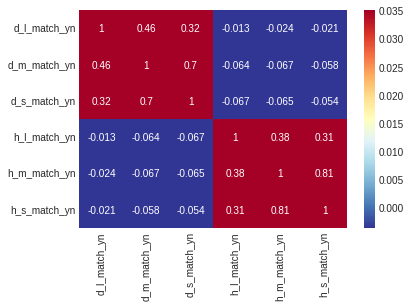

In [115]:
sns.heatmap(train[['d_l_match_yn',	'd_m_match_yn',	'd_s_match_yn',	'h_l_match_yn', 'h_m_match_yn',	'h_s_match_yn']].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0036, vmax = 0.035)

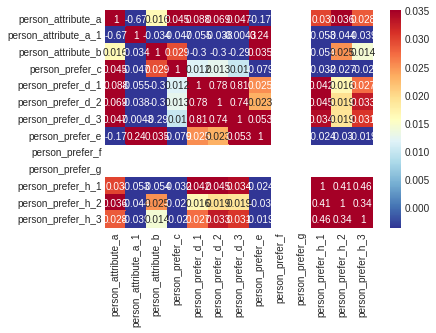

In [116]:
sns.heatmap(train[['person_attribute_a',	'person_attribute_a_1','person_attribute_b',	'person_prefer_c',	'person_prefer_d_1',
                   'person_prefer_d_2', 'person_prefer_d_3',	'person_prefer_e', 'person_prefer_f',	'person_prefer_g',
                   'person_prefer_h_1',	'person_prefer_h_2',	'person_prefer_h_3']].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0036, vmax = 0.035)

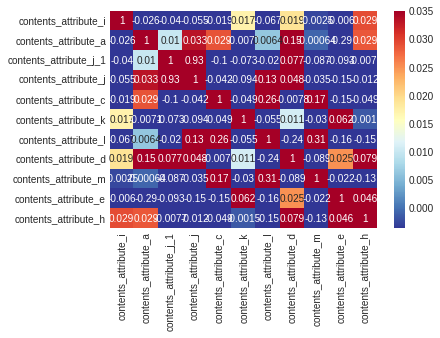

In [117]:
sns.heatmap(train[['contents_attribute_i',	'contents_attribute_a', 'contents_attribute_j_1',	'contents_attribute_j',	'contents_attribute_c',
                   'contents_attribute_k', 'contents_attribute_l',	'contents_attribute_d',	'contents_attribute_m','contents_attribute_e',	'contents_attribute_h']].corr(), cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0036, vmax = 0.035)

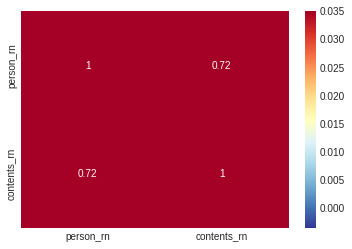

In [118]:
sns.heatmap(train[['person_rn',	'contents_rn']].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0036, vmax = 0.035)